In [90]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linspace
import numpy as np
import pylab as pl

In [91]:
dados = pd.read_table('OnlineNewsPopularity.csv', sep=',')
aderenciacomp= pd.read_table('aderenciacomp.csv', sep=';')
aderencianum= pd.read_table('aderencianum.csv', sep=';')

In [92]:
dados.filtrados=dados.loc[:, (" n_tokens_content", " shares")]
dados.filtrados.columns=["num_palavras_noticia","compartilhamentos"]
dados.filtrados.describe()

,num_palavras_noticia,compartilhamentos
count,39644.000000,39644.000000
mean,546.514731,3395.380184
std,471.107508,11626.950749
min,0.000000,1.000000
25%,246.000000,946.000000
50%,409.000000,1400.000000
75%,716.000000,2800.000000
max,8474.000000,843300.000000


    Para as futuras análises, será importante perceber que existem alguns dados extremamente fora do padrão, como podemos perceber nos compartilhamentos - 75% das notícias analisadas possuem menos de 2700 compartilhamentos, entretanto há alguns poucos casos extremos que levam o desvio padrao para mais de 10mil, desta forma, para que isso não afete tanto nossa análise, filtraremos estes dados em 3 vezes o valor da média, desta forma excluímos os dados extremos sem prejudicar a interpretação.

In [93]:
dados.filtrados = dados.filtrados[(dados.filtrados.num_palavras_noticia!=dados.filtrados.num_palavras_noticia.min())& (dados.filtrados.compartilhamentos!=dados.filtrados.compartilhamentos.min())& (dados.filtrados.compartilhamentos<10000)]

In [94]:
faixas_compartilhamentos=linspace(0,8000,80)
faixas_palavras=linspace(0,8000,80)
faixas_palavras2=linspace(0,4000,40)

In [95]:
dados.filtrados.describe()

,num_palavras_noticia,compartilhamentos
count,36355.000000,36355.000000
mean,564.054463,2013.861367
std,464.088031,1746.921412
min,18.000000,5.000000
25%,261.000000,924.500000
50%,425.000000,1400.000000
75%,730.000000,2400.000000
max,7764.000000,9900.000000


    Agora podemos perceber que o desvio padrão diminuiu radicalmente ao tirarmos os valores muitos extremos que prejudicariam a análise.

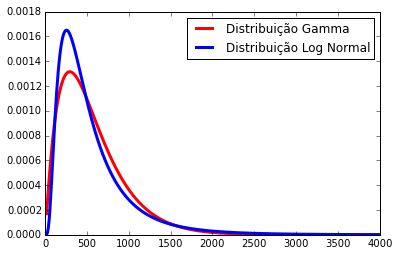

In [128]:
from scipy import stats
shape, loc, scale = stats.lognorm.fit(dados.filtrados.num_palavras_noticia, floc=0) # Fit a curve to the variates
mu = np.log(scale)
Media = dados.filtrados.num_palavras_noticia.mean()
desvio = dados.filtrados.num_palavras_noticia.std()
gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)
plt.plot(x, gamma, '-', color='r', label="Gamma",lw=3)
x = np.linspace(dados.filtrados.num_palavras_noticia.min(), 4000, num=400)
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'b', linewidth=3)
plt.legend(['Distribuição Gamma','Distribuição Log Normal'])

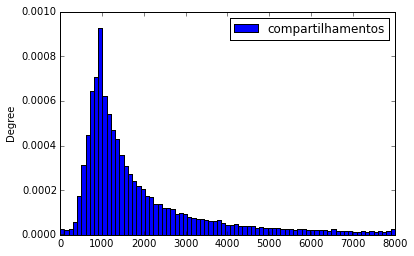

In [97]:
a=pd.DataFrame.plot(kind='hist', data=dados.filtrados.compartilhamentos,bins= faixas_compartilhamentos, color=('blue'),normed=True)

    A primeira variável a ser analisada é a quantidade de compartilhamentos da notícia. As distribuições que mais se adequam ao comportamento desta variável são a Log Normal e a Gamma, como pode ser visto acima.

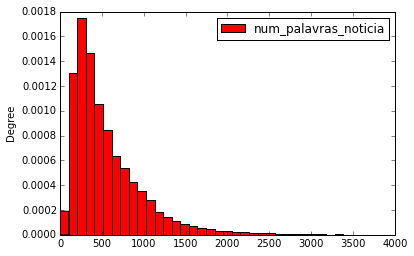

In [98]:
pd.DataFrame.plot(kind='hist', data=dados.filtrados.num_palavras_noticia,bins= faixas_palavras2, color=('red'),normed=True)

    A outra variável a ser analisada é o número de palavras contido na notícia e apresenta um comportamento parecido com a variável Compartilhamentos, desta forma, as distribuições que mais parecem se adequar ao seu comportamento são as mesmas: Log Normal e Gamma.

# Plot das distribuições a serem analisadas junto aos dados reais

    Para analisármos as duas variáveis usaremos duas distribuições e faremos vários testes de aderência a fim de descobrir qual delas representa melhor o comportamento da variável estudada. Para isso, primeiramente plotaremos um histograma dos dados experimentais e por cima plotaremos o teórico das duas distribuiçõe estudadas, no caso a Log normal e a Gamma.

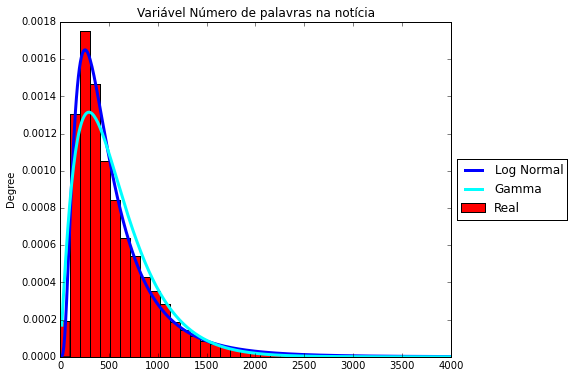

In [99]:
#---------------PLOT HISTOGRAMA--------------
pd.DataFrame.plot(kind='hist', data=dados.filtrados.num_palavras_noticia,bins= faixas_palavras2, color=('red'),normed=True,legend=False,figsize=(7,6))
#---------------PLOT LOG NORMAL--------------
shape, loc, scale = stats.lognorm.fit(dados.filtrados.num_palavras_noticia, floc=0)
Media = dados.filtrados.num_palavras_noticia.mean()
desvio = dados.filtrados.num_palavras_noticia.std()
x = np.linspace(dados.filtrados.num_palavras_noticia.min(), 4000, num=400)
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'b', linewidth=3)
#--------------PLOT GAMMA--------------------
gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)
plt.plot(x, gamma, '-', color='cyan', label="Gamma",lw=3)
plt.legend(['Log Normal','Gamma','Real'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Variável Número de palavras na notícia")

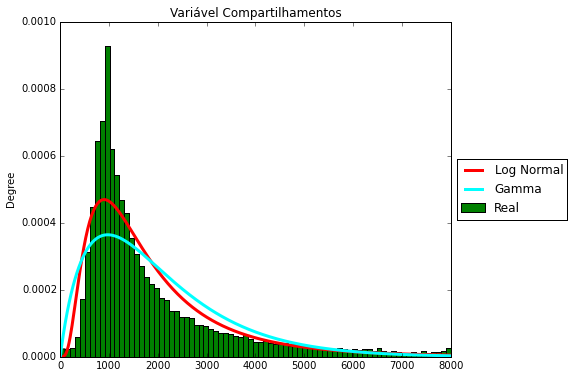

In [100]:
#------------------ PLOT HISTOGRAMA-------------------
pd.DataFrame.plot(kind='hist', data=dados.filtrados.compartilhamentos,bins= faixas_palavras, color=('g'),normed=True,legend=False,figsize=(7,6))
#------------------ PLOT LOG NORMAL-------------------
shape, loc, scale = stats.lognorm.fit(dados.filtrados.compartilhamentos, floc=0)
Media = dados.filtrados.compartilhamentos.mean()
desvio = dados.filtrados.compartilhamentos.std()
x = np.linspace(dados.filtrados.compartilhamentos.min(), 8000, num=400)
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale=scale), 'r', linewidth=3)
ax = plt.gca()
#------------------- PLOT GAMMA--------------------------
gamma_a,gamma_loc,gamma_scale= stats.gamma.fit(dados.filtrados.compartilhamentos)
gamma = stats.gamma.pdf(x, a=gamma_a,scale=gamma_scale, loc=gamma_loc)
plt.plot(x, gamma, '-', color='cyan', label="Gamma",lw=3)
plt.legend(['Log Normal','Gamma','Real'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Variável Compartilhamentos")

# TESTES DE ADERÊNCIA DA VARIAVEL COMPARTILHAMENTOS

In [101]:
dfc=dados.filtrados.compartilhamentos

In [102]:
fra = [] # frequencia relativa acumulada
for i in range(len(dfc)):
    acc = (i - 0.5) / len(dfc)
    if acc < 0:
        acc = 0.0
    fra.append(acc)

In [103]:
shape, loc, scale = stats.lognorm.fit(dfc, floc=0)
q_lnorm = stats.lognorm.ppf(fra,s=shape,loc=loc, scale=scale)
q_gamma = stats.gamma.ppf(fra, scale=gamma_scale, loc=gamma_loc, a=gamma_a)

In [104]:
ldfc=sorted(dfc.values.tolist())

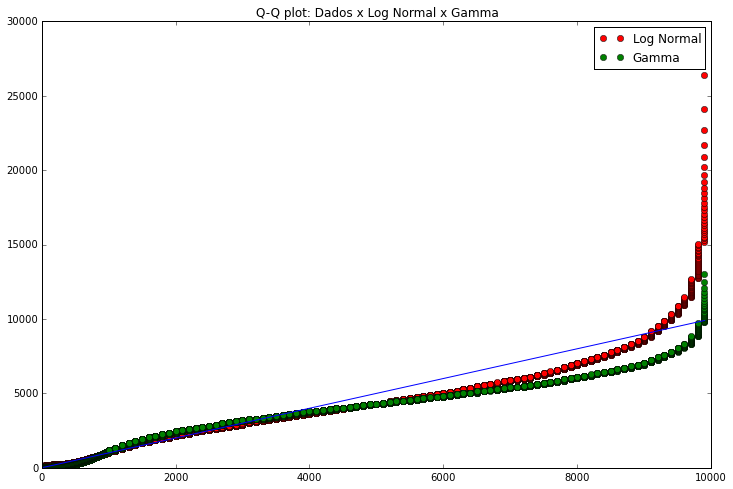

In [105]:
fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Log Normal x Gamma")

lnorm, = plt.plot(ldfc, q_lnorm, 'o', color="red", label="Log Normal")
gamma_plot, = plt.plot(ldfc, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[lnorm, gamma_plot])
plt.plot((min(ldfc), max(ldfc)), (min(ldfc), max(ldfc)), '-')


# Testes de aderência que utilizam o QQ PLOT

# Erro quadrático

In [106]:
def erro_quadratico(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = (fra_dados[i] - quantil_teorico[i])**2
        eq = eq + dif_quad
    return eq

erro_quadratico_lnorm = erro_quadratico(ldfc, q_lnorm)
erro_quadratico_gamma = erro_quadratico(ldfc, q_gamma)

print("Erro quadratico da Log Normal :", erro_quadratico_lnorm)
print("Erro quadratico da gamma :", erro_quadratico_gamma)
print("Diferença entre erro quadratico da Log normal e erro quadratico da gama  :", (erro_quadratico_lnorm - erro_quadratico_gamma))

Erro quadratico da Log Normal : 6315968607.14
Erro quadratico da gamma : 8400820449.69
Diferença entre erro quadratico da Log normal e erro quadratico da gama  : -2084851842.55


# Erro quadrático médio

In [107]:
eqm_lnorm = erro_quadratico_lnorm/len(ldfc)
eqm_gamma = erro_quadratico_gamma/len(ldfc)

print("Erro quadratico médio da Log Normal :", eqm_lnorm)
print("Erro quadratico médio da gamma :", eqm_gamma)
print("Diferença entre erro quadratico médio da Log Normal e o erro quadratico médio da gamma :", (eqm_lnorm-eqm_gamma))

Erro quadratico médio da Log Normal : 173730.397666
Erro quadratico médio da gamma : 231077.443259
Diferença entre erro quadratico médio da Log Normal e o erro quadratico médio da gamma : -57347.0455934


# Soma de diferenças

In [108]:
def soma_diferencas(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = abs(fra_dados[i] - quantil_teorico[i])
        eq = eq + dif_quad
    return eq

soma_diferenças_lnorm = soma_diferencas(ldfc, q_lnorm)
soma_diferenças_gamma = soma_diferencas(ldfc, q_gamma)

print("Soma de diferenças da Log Normal :", soma_diferenças_lnorm)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)
print("Diferença entre a soma de diferenças da Log Normal :", soma_diferenças_lnorm-soma_diferenças_gamma)

Soma de diferenças da Log Normal : 7348905.44742
Soma de diferenças da gamma : 11664095.9731
Diferença entre a soma de diferenças da Log Normal : -4315190.52564


# Testes de aderência que utilizam a cumulativa

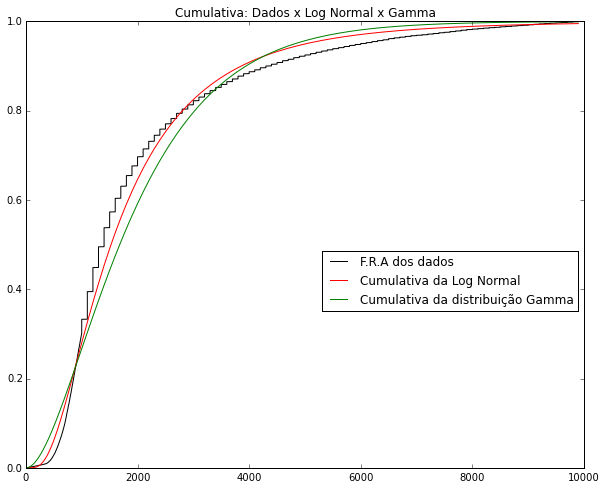

In [109]:
# fra e FDA
cdf_lnorm = stats.lognorm.cdf(ldfc,shape, scale=scale) #FDA
cdf_gamma = stats.gamma.cdf(ldfc, scale=gamma_scale, loc=gamma_loc, a=gamma_a)


fig = plt.figure(figsize=(10,8))

plt.title("Cumulativa: Dados x Log Normal x Gamma")

dados_fra_plot, = plt.plot(ldfc, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(ldfc, cdf_lnorm, '-', color='red', label = "Cumulativa da Log Normal")
cdf_gamma_plot, = plt.plot(ldfc, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")


plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot],bbox_to_anchor=(1, 0.5))

# Erro quadrático nas CDFs

In [110]:
erro_quad_cdf_lnorm = sum((fra - cdf_lnorm)**2)
erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)
print("Erro quadrático da CDF da Log Normal versus F.R.A", erro_quad_cdf_lnorm)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)
print("Diferença entre erro quadrático da CDF da Log Normal versus F.R.A e Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_lnorm - erro_quad_cdf_gamma)

Erro quadrático da CDF da Log Normal versus F.R.A 54.5735035896
Erro quadrático da CDF da Gamma versus F.R.A 168.525516504
Diferença entre erro quadrático da CDF da Log Normal versus F.R.A e Erro quadrático da CDF da Gamma versus F.R.A -113.952012914


# Diferenças absolutas

In [111]:
soma_difs_cdf_lnorm = sum( abs(fra - cdf_lnorm))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da Log Normal versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_lnorm, soma_difs_cdf_gamma))
print("Diferença entre Erro da soma do módulo das diferenças da Log Normal versus F.R.A e Erro da soma do módulo das diferenças da gamma versus F.R.A: ", soma_difs_cdf_lnorm-soma_difs_cdf_gamma)

Erro da soma do módulo das diferenças da Log Normal versus F.R.A: 1191.6473393795313 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 2099.0460845892967
Diferença entre Erro da soma do módulo das diferenças da Log Normal versus F.R.A e Erro da soma do módulo das diferenças da gamma versus F.R.A:  -907.39874521


# Teste de aderência de Kolmogorov-Smirnov

In [112]:
ks_aderencia_lnorm = max(abs(fra-cdf_lnorm))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))
print("Teste K-S para a Log Normal com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(shape, ks_aderencia_lnorm, gamma_scale, gamma_loc, ks_aderencia_gamma))
print("Diferença entre o resultado do Teste K-S para a Log Normal e Teste K-S para a gamma: ", ks_aderencia_lnorm - ks_aderencia_gamma)

Teste K-S para a Log Normal com μ= 0.72: 0.085
Teste K-S para a gamma com scale=1038.026, loc=0 e a=4.826  0.131:
Diferença entre o resultado do Teste K-S para a Log Normal e Teste K-S para a gamma:  -0.046049355524


In [113]:
aderenciacomp

,Unnamed: 0,Erro Quadratico,Erro Quadratico Medio,Soma de Diferencas,Erro quadratico nas CDFs,Diferencas Absolutas,Kolmogorov-Smirnov
0,Distribuicao Gamma,8400820449,231077,11664095,168,2099,"0,131"
1,Distribuicao Log Normal,6315968607,173730,7348905,54,1191,"0,085"
2,Diferenca entre Gamma e Log Normal,2084851842,57347,4315190,114,908,"0,046"


    Esta é a tabela dos resultados de aderência da variável compartilhamentos. Como podemos perceber, a distribuição Log Normal teve um erro menor em todos os testes, o que nos permite qualificá-la como uma melhor distribuição para representar o comportamento da variável analisada.

# Testes de aderência da variável 'Número de Palavras na Notícia'

In [114]:
dfn=dados.filtrados.num_palavras_noticia

In [115]:
fra = [] # frequencia relativa acumulada
for i in range(len(dfn)):
    acc = (i - 0.5) / len(dfn)
    if acc < 0:
        acc = 0.0
    fra.append(acc)

In [116]:
shape, loc, scale = stats.lognorm.fit(dfn, floc=0)
q_lnorm = stats.lognorm.ppf(fra,s=shape,loc=loc, scale=scale)
q_gamma = stats.gamma.ppf(fra, scale=gamma_scale, loc=gamma_loc, a=gamma_a)

In [117]:
ldfn=sorted(dfn.values.tolist())

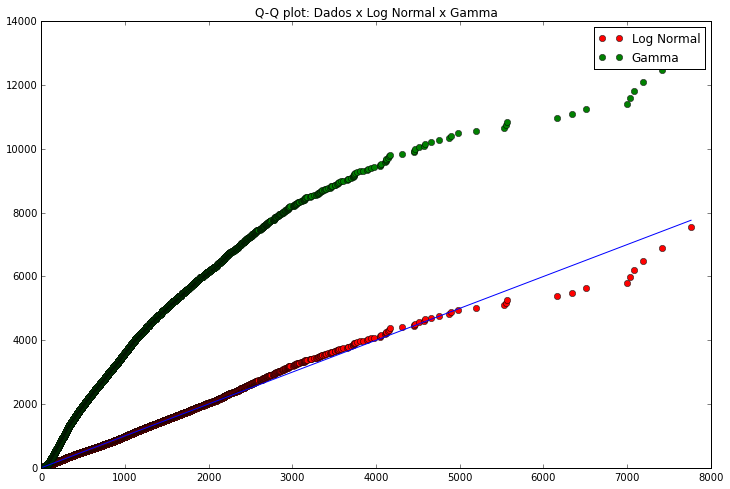

In [118]:
fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Log Normal x Gamma")

lnorm, = plt.plot(ldfn, q_lnorm, 'o', color="red", label="Log Normal")
gamma_plot, = plt.plot(ldfn, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[lnorm, gamma_plot])
plt.plot((min(ldfn), max(ldfn)), (min(ldfn), max(ldfn)), '-')


# Testes de aderência que utilizam o QQ PLOT

# Erro quadrático

In [119]:
def erro_quadratico(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = (fra_dados[i] - quantil_teorico[i])**2
        eq = eq + dif_quad
    return eq

erro_quadratico_lnorm = erro_quadratico(ldfn, q_lnorm)
erro_quadratico_gamma = erro_quadratico(ldfn, q_gamma)

print("Erro quadratico da Log Normal :", erro_quadratico_lnorm)
print("Erro quadratico da gamma :", erro_quadratico_gamma)
print("Diferença entre erro quadratico da Log normal e erro quadratico da gama  :", (erro_quadratico_lnorm - erro_quadratico_gamma))

Erro quadratico da Log Normal : 19647135.8246
Erro quadratico da gamma : 112230148805.0
Diferença entre erro quadratico da Log normal e erro quadratico da gama  : -112210501669.0


# Erro quadrático médio

In [120]:
eqm_lnorm = erro_quadratico_lnorm/len(ldfn)
eqm_gamma = erro_quadratico_gamma/len(ldfn)

print("Erro quadratico médio da Log Normal :", eqm_lnorm)
print("Erro quadratico médio da gamma :", eqm_gamma)
print("Diferença entre erro quadratico médio da Log Normal e o erro quadratico médio da gamma :", (eqm_lnorm-eqm_gamma))

Erro quadratico médio da Log Normal : 540.424586016
Erro quadratico médio da gamma : 3087062.26942
Diferença entre erro quadratico médio da Log Normal e o erro quadratico médio da gamma : -3086521.84483


# Soma de diferenças

In [121]:
def soma_diferencas(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = abs(fra_dados[i] - quantil_teorico[i])
        eq = eq + dif_quad
    return eq

soma_diferenças_lnorm = soma_diferencas(ldfn, q_lnorm)
soma_diferenças_gamma = soma_diferencas(ldfn, q_gamma)

print("Soma de diferenças da Log Normal :", soma_diferenças_lnorm)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)
print("Diferença entre a soma de diferenças da Log Normal :", soma_diferenças_lnorm-soma_diferenças_gamma)

Soma de diferenças da Log Normal : 403699.995887
Soma de diferenças da gamma : 52693336.1345
Diferença entre a soma de diferenças da Log Normal : -52289636.1386


# Testes de aderência que utilizam a cumulativa

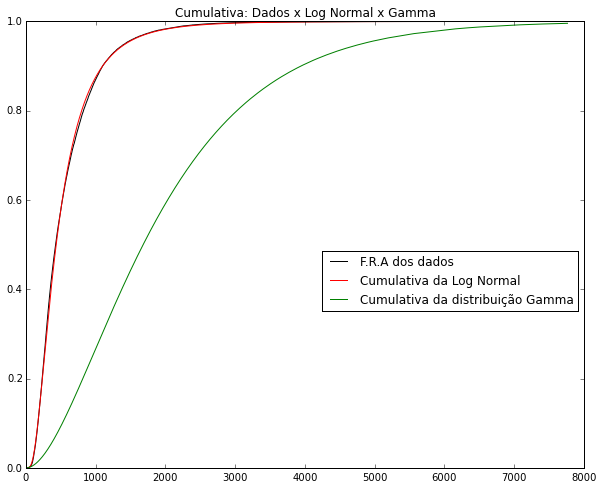

In [122]:
# fra e FDA
cdf_lnorm = stats.lognorm.cdf(ldfn,shape, scale=scale) #FDA
cdf_gamma = stats.gamma.cdf(ldfn, scale=gamma_scale, loc=gamma_loc, a=gamma_a)


fig = plt.figure(figsize=(10,8))

plt.title("Cumulativa: Dados x Log Normal x Gamma")

dados_fra_plot, = plt.plot(ldfn, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(ldfn, cdf_lnorm, '-', color='red', label = "Cumulativa da Log Normal")
cdf_gamma_plot, = plt.plot(ldfn, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")


plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot],bbox_to_anchor=(1, 0.5))

# Erro quadrático nas CDFs

In [123]:
erro_quad_cdf_lnorm = sum((fra - cdf_lnorm)**2)
erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)
print("Erro quadrático da CDF da Log Normal versus F.R.A", erro_quad_cdf_lnorm)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)
print("Diferença entre erro quadrático da CDF da Log Normal versus F.R.A e Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_lnorm - erro_quad_cdf_gamma)

Erro quadrático da CDF da Log Normal versus F.R.A 3.11398508414
Erro quadrático da CDF da Gamma versus F.R.A 6429.57430362
Diferença entre erro quadrático da CDF da Log Normal versus F.R.A e Erro quadrático da CDF da Gamma versus F.R.A -6426.46031854


# Diferenças Absolutas

In [124]:
soma_difs_cdf_lnorm = sum( abs(fra - cdf_lnorm))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da Log Normal versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_lnorm, soma_difs_cdf_gamma))
print("Diferença entre Erro da soma do módulo das diferenças da Log Normal versus F.R.A e Erro da soma do módulo das diferenças da gamma versus F.R.A: ", soma_difs_cdf_lnorm-soma_difs_cdf_gamma)

Erro da soma do módulo das diferenças da Log Normal versus F.R.A: 269.49160692625424 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 13665.111455216933
Diferença entre Erro da soma do módulo das diferenças da Log Normal versus F.R.A e Erro da soma do módulo das diferenças da gamma versus F.R.A:  -13395.6198483


# Testes de aderência de Kolmogorov-Smirnov

In [125]:
ks_aderencia_lnorm = max(abs(fra-cdf_lnorm))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))
print("Teste K-S para a Log Normal com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(shape, ks_aderencia_lnorm, gamma_scale, gamma_loc, ks_aderencia_gamma))
print("Diferença entre o resultado do Teste K-S para a Log Normal e Teste K-S para a gamma: ", ks_aderencia_lnorm - ks_aderencia_gamma)

Teste K-S para a Log Normal com μ= 0.73: 0.019
Teste K-S para a gamma com scale=1038.026, loc=0 e a=4.826  0.604:
Diferença entre o resultado do Teste K-S para a Log Normal e Teste K-S para a gamma:  -0.585096813269


In [126]:
aderencianum

,Unnamed: 0,Erro Quadratico,Erro Quadratico Medio,Soma de Diferencas,Erro quadratico nas CDFs,Diferencas Absolutas,Kolmogorov-Smirnov
0,Distribuicao Gamma,"1,1223E+11",3087062,52693336,"6429,57",13665,"0,604"
1,Distribuicao Log Normal,19647135,540,403699,"3,11",269,"0,019"
2,Diferenca entre Gamma e Log Normal,"1,12211E+11",3086522,52289637,"6426,46",13396,"0,585"


    Nesta comparação fica clara que a Log normal se adequa muito mais à variavel analisada do que a distribuição Gamma. Podemos perceber que os erros obtidos na distribuição Log Normal foram bem baixos, e ao analisarmos o gráfico "Cumulativa: Dados X Log Normal X Gamma" podemos ver que a linha que representa a soma das frequências acumuladas desta distribuição está muito próxima dos dados experimentais, desta forma esta distribuição é uma ótima escolha para representar o comportamento desta variável.